# Question 4

In [ ]:
import scipy.io.wavfile as wavfile
import scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa

## Part 1 

OPENNING NOISY FILE

In [ ]:
noisy_file_name = "/content/drive/MyDrive/Singal HW Practical/noisy1.wav"
sample_rate, noisy_signal = wavfile.read(noisy_file_name)

# resampling to make sample rate same for both signals


sample_rate, noisy_signal.shape, noisy_signal

(22050,
 (400000,),
 array([1032, 1536, 1420, ...,   12,  116,   62], dtype=int16))

PLAYING SOUNDS

In [ ]:
# ! pip install IPython
import IPython

In [ ]:
IPython.display.Audio(noisy_file_name)

CONVERTING TO FREQUENCY DOMAIN

In [ ]:
noisy_fft = scipy.fft.fft(noisy_signal)
noisy_freq = scipy.fft.fftfreq(len(noisy_fft), (1.0/sample_rate)) 

noisy_fft,noisy_fft.shape,"#",  noisy_freq,noisy_freq.shape

(array([5119210.              -0.j        ,
         -25095.40340734-3289515.8833964j ,
          67792.24405946  -21883.90381895j, ...,
          -9710.09191065+1185912.64372203j,
          67792.24405946  +21883.90381895j,
         -25095.40340734+3289515.8833964j ]),
 (400000,),
 '#',
 array([ 0.      ,  0.055125,  0.11025 , ..., -0.165375, -0.11025 ,
        -0.055125]),
 (400000,))

PLOTING SOUND SIGNAL IN TIME DOMAIN
So that we can see, speech gap is the second half part of sound wave.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


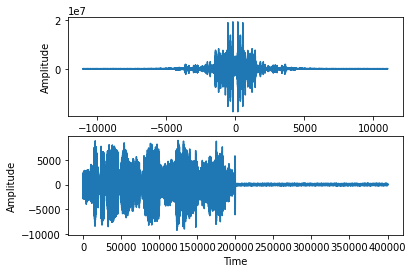

In [ ]:
plt.subplot(2,1,1)
plt.plot(noisy_freq, noisy_fft)
plt.xlabel("Frequency (HZ)")
plt.ylabel("Amplitude")

plt.subplot(2,1,2);
plt.plot(noisy_signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

CUTTING SECOND HALF AND PLOTING SOUND WAVE

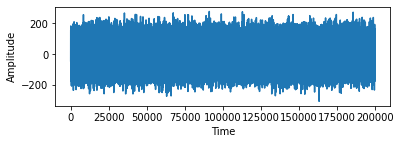

In [ ]:
second_half_noisy_signal = noisy_signal[noisy_signal.shape[0]//2:]
plt.subplot(2,1,2)
plt.plot(second_half_noisy_signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

CONVERTING TO FREQUENCY DOMAIN

In [ ]:
second_half_noisy_fft = scipy.fft.fft(second_half_noisy_signal)
second_half_noisy_freq = scipy.fft.fftfreq(len(second_half_noisy_fft), (1.0/sample_rate)) 

second_half_noisy_fft,second_half_noisy_fft.shape,"#",  second_half_noisy_freq,second_half_noisy_freq.shape

(array([-37316.            -0.j        ,   3987.33385015-14551.20381317j,
         29486.66251546+23856.16063643j, ...,
        -12470.95565537-35172.28253311j,  29486.66251546-23856.16063643j,
          3987.33385015+14551.20381317j]),
 (200000,),
 '#',
 array([ 0.     ,  0.11025,  0.2205 , ..., -0.33075, -0.2205 , -0.11025]),
 (200000,))

PLOTIGN SECOND HALF IN FREQUENCY DOMAIN

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

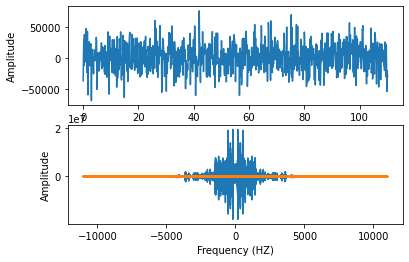

In [ ]:
plt.subplot(2,1,1)
plt.plot(second_half_noisy_freq[:1000], second_half_noisy_fft[:1000])
plt.xlabel("Frequency (HZ)")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.plot(noisy_freq, noisy_fft)
plt.plot(second_half_noisy_freq, second_half_noisy_fft)
plt.xlabel("Frequency (HZ)")
plt.ylabel("Amplitude")

[-37316.            -0.j           3987.33385015-14551.20381317j
  29486.66251546+23856.16063643j ... -12470.95565537-35172.28253311j
  29486.66251546-23856.16063643j   3987.33385015+14551.20381317j] ----- [0.-0.j 0.+0.j 0.+0.j ... 0.-0.j 0.+0.j 0.+0.j]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


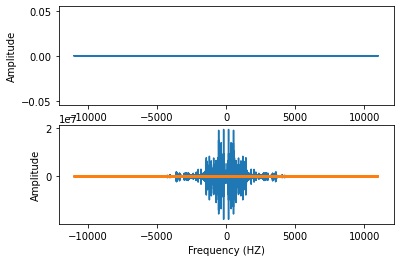

In [ ]:

data_indicies = abs(noisy_fft) >= 100000
denoised_fft = data_indicies * noisy_fft
second_half_data_indices = abs(second_half_noisy_fft) >= 100000
second_half_denoised_fft = second_half_data_indices * second_half_noisy_fft
print(second_half_noisy_fft,"-----", second_half_denoised_fft)


plt.subplot(2,1,1)
plt.plot(second_half_noisy_freq, second_half_denoised_fft)
plt.xlabel("Frequency (HZ)")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.plot(noisy_freq, denoised_fft)
plt.plot(second_half_noisy_freq, second_half_noisy_fft)
plt.xlabel("Frequency (HZ)")
plt.ylabel("Amplitude")

# SAVING SECOND HALF TO SEE THE DIFFERENCE
second_half_denoised_ifft = scipy.fft.ifft(second_half_denoised_fft)

second_half_denoised_file_name = "/content/drive/MyDrive/Singal HW Practical/second_half_denoise1.wav"
wavfile.write(second_half_denoised_file_name, sample_rate, second_half_denoised_ifft.astype(noisy_signal.dtype))

IPython.display.Audio(second_half_denoised_file_name)

CONVERTING TO TIME DOMAIN + SAVING + PLAYING

In [ ]:
denoised_ifft = scipy.fft.ifft(denoised_fft)

denoised_file_name = "/content/drive/MyDrive/Singal HW Practical/denoise1.wav"
wavfile.write(denoised_file_name, sample_rate, denoised_ifft.astype(noisy_signal.dtype))

IPython.display.Audio(denoised_file_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
